In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Скроем предупреждения, чтобы не мозолили глаза
import warnings
warnings.filterwarnings("ignore")

In [30]:
scoring_data = pd.read_csv('german_credit_data.csv').drop(['Unnamed: 0'], axis=1)

In [34]:
scoring_data.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,is_risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1
2,49,male,1,own,little,NaN,2096,12,education,good,0


In [33]:
# Сразу добавим численное обозначение риска 1 - bad risk, 0 - good risk
scoring_data['is_risk'] = scoring_data.apply(lambda x: 0 if x['Risk'] == 'good' else 1, axis=1)

## Задача: Определить, какой из факторов оказывает наибольшее влияние на риск выдачи кредита
## (выявить причину невозвратов)

У нас имеются данные кредитного скорринга с маркером рисковости пользователя и его описания по ряду других колонок.

**Age:** This variable bank contains the age information of the customers.

**Sex:** This variable contains the gender information of the bank customers.

**Job:** This variable contains occupational information of bank customers. Professions are divided into four categories according to skill level. (0 - unskilled and nonresident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

**Housing:** This variable includes the housing status of the bank customers.

**Saving Accounts:** This variable bank contains customers savings information.Customers savings are classified as little, moderate, quite rich, rich.

**Checking Accounts:** This variable show the cash in the accounts of bank customers.

**Credit Amount:** This variable shows how much credit the bank customers get.

**Duration:** This variable contains the specified time to pay the credit.

**Purpose:** This variable shows the purpose for which the bank customer taking credit. Taking credit by customers are classified as car, furniture / equipment, radio / TV, domestic appliances, repairs, education, business, vacation / others.

**Risk:** This variable contains the customers risk information. Customers in the Data Set have previously taken credit from banks. A value of 1 was given for customers who paid the credit and 0 for customers who could not.

## Типы данных

Работая с датасетами, вы чаще всего будете встречать 3 наиболее популярных типа данных:

    - Количественные / Числовые
    - Категориальные
    - Ранговые
    
    
**Количественный тип самый распространённый:**

Тут даже с примерами всё просто: рост, зарплата, вероятность, объём, площадь, возраст. Этот тип обладает двумя главными свойствами: [континуальностью](https://ru.wikipedia.org/wiki/Континуум_(теория_множеств)) (для любых двух элементов всегда найдётся целое множество элементов между ними) или хотя бы [счётностью](https://ru.wikipedia.org/wiki/Счётное_множество) (элементы, даже если их бесконечное количество, можно пересчитать) и [отношением порядка](https://ru.wikipedia.org/wiki/Отношение_порядка) (для любой пары неодинаковых элементов один из них всегда будет больше другого).



**Категориальный тип устроен проще:**

Данные этого типа - это элементы из ограниченного набора значений, например пол человека, страна, город, операционная система, название руды, и др. Ничего специфического и сложного. Иногда может быть представлен строковым типом, иногда чисовым - тут от способа представления данных зависит.


**Ранговый тип данных:**

Это комбинированный тип данных, который, также как и категориальные данные, представляет собой ограниченное множество значений. Но обладает упорядоченностью, т.е. можно сказать, что элементы внутри списка выстроены в порядке возрастания какого-то свойства или признака. Пример рангового типа данных - это обобщения над возрастом: детский возраст, школьный возраст, студенческий, возраст молодого специалиста, возраст специалиста, зрелый возраст, предпенсионный, пенсионный и т.д. Здесь мы взяли количественный тип данных "Возраст" и разбили на интервалы, дав каждому интервалу название. Примером такого же тпа данных может быть ваша оценка сервиса в приложении с выховом такси. "Совсем не понравилось", "Не понравилось", "Нормально", "Хорошо", "Отлично" - это тоже ранговый тип данных, потому что значения можно выстроить по возрастанию вашей удовлетворённости.

In [42]:
scoring_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,is_risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1
2,49,male,1,own,little,NaN,2096,12,education,good,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,0
4,53,male,2,free,little,little,4870,24,car,bad,1


In [44]:
scoring_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
 10  is_risk           1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


## Заполнение пропусков

Методов заполнения пустот имеется огромное количество, но также они зависимы от типа данных и решаемой задачи. Практически любое ваше действие с данными может исказить исходное распределение переменной - но это не страшно, более того, иногда это полезно. Поэтому о методах сразу расскажу в контексте решаемой задачи:


**Решаю аналитическую задачу (строю максимально точные выводы по данным):**

Для подобных задач редко пользуются методами, искажающими распределения. 

Категориальные и ранговые пропуски можно заполнить заглушкой в виде 'unknown', т.к. незаполненные данные в этом случае могут нести в себе информативность. Например в задаче кредитного скорринга незаполненное поле о наличии других кредитов может нести в себе вывод о том, что 


Количественные признаки обычно оставляют с пропусками, чтобы не допустить смещения распределений, и при построении выводов используют лишь заполненные строки. Либо количественные признаки превращают в ранговые, используя [биннинг](https://en.wikipedia.org/wiki/Data_binning) (объединение в группы, как в примерах с возрастом). И тогда незаполненные строки можно объединить в одну группу с заглушкой 'unknown' для дополнительного исследования. Например, клиент банка мог не указать объём заработной платы; биннинг заработных плат может помочь исследовать, как влияет это поле на рисковость клиента.


**Решаю задачу прогнозирования (хочу получить максимальное качество):**

В задачах прогнозирования наоборот очень важно сохранить как можно больше строк. Точность алгоритма прогнозирования зачастую сильнее зависит от количества данных и их вариабельности, нежели от несмещённости исходных распределений.
Поэтому здесь имеет место инженерная задача поиска лучшего заполнения для данных.

Для количественных данных можно найти множество методов заполнения, но самые популярные следующие:

    - Заполнение нулями
    - Заполнение медианами
    - Заполнение средним значением по колонке
    - Заполнение наиболее вероятным значением
    - Использовать метод kNN (заполнение по наиболее близким соседям)
    - Заполнение заглушками (например нехарактерным значением, для возраста "-1")
    
Для категориальных и ранговых данных сохраняются те же методы, что и для аналитических задач, но добавляются ещё методы:

    - Заполнения наиболее частым
    - Заполнение наиболее вероятным

In [50]:
scoring_data.fillna('unknown', inplace=True)

In [152]:
scoring_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
 10  is_risk           1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


## Рассмотрим влияние факторов на рисковость пользователя

In [80]:
def calc_risks(column):
    
    """
    Функция позволяет рассчитать среднее значение рискованности для группы пользователей.
    Работает только для категориальных и ранговых переменных.
    Для количественных переменных лучше использовать графики-гистограммы.
    """
    
    return scoring_data.groupby(
        column, 
        as_index=False
    ).agg( 
        {   ## Рассчитаем сразу две функции от одного датасета: среднее значение риска и кол-во клиентов
            'is_risk': [np.mean, 'size']
        }
    ).droplevel(
        ## После расчёта исправим названия колонок
        level=0, 
        axis=1
    ).rename(
        {
            '': column, 
            'mean': 'risk_level', 
            'size': 'clients_count'
        }, 
        axis=1
    ).sort_values(
        ## Отсортируем по убыванию рискованности
        by=['risk_level'],
        ascending=False
    )

In [143]:
res = scoring_data.pivot_table(columns='Purpose', values='is_risk', index='Housing', aggfunc=['mean', 'std'])

In [144]:
res

mean                                                              \
Purpose  business       car domestic appliances education furniture/equipment   
Housing                                                                         
free     0.600000  0.418182                 NaN  0.466667            0.272727   
own      0.263158  0.273973                 0.3  0.352941            0.295082   
rent     0.687500  0.365079                 0.5  0.400000            0.395833   

                                                  std            \
Purpose  radio/TV   repairs vacation/others  business       car   
Housing                                                           
free     0.333333  0.666667            0.25  0.547723  0.497807   
own      0.202643  0.294118            0.50  0.443273  0.447017   
rent     0.289474  0.500000             NaN  0.478714  0.485320   

                                                                               \
Purpose domestic appliances education furniture/equipment  radio/TV   repairs   
Housing                                                                         
free                    NaN  0.516398            0.467099  0.487950  0.577350   
own                0.483046  0.485071            0.457960  0.402857  0.469668   
rent               0.707107  0.516398            0.494204  0.459606  0.707107   

                         
Purpose vacation/others  
Housing                  
free           0.500000  
own            0.534522  
rent                NaN

In [81]:
calc_risks('Purpose')

,Purpose,risk_level,clients_count
7,vacation/others,0.416667,12
3,education,0.389831,59
6,repairs,0.363636,22
0,business,0.350515,97
2,domestic appliances,0.333333,12
4,furniture/equipment,0.320442,181
1,car,0.314540,337
5,radio/TV,0.221429,280


In [82]:
calc_risks('Checking account')

,Checking account,risk_level,clients_count
0,little,0.492701,274
1,moderate,0.390335,269
2,rich,0.222222,63
3,unknown,0.116751,394


In [83]:
calc_risks('Saving accounts')

,Saving accounts,risk_level,clients_count
0,little,0.359867,603
1,moderate,0.330097,103
4,unknown,0.174863,183
2,quite rich,0.174603,63
3,rich,0.125000,48


In [84]:
calc_risks('Sex')

,Sex,risk_level,clients_count
0,female,0.351613,310
1,male,0.276812,690


In [85]:
calc_risks('Job')

,Job,risk_level,clients_count
3,3,0.344595,148
0,0,0.318182,22
2,2,0.295238,630
1,1,0.280000,200


In [86]:
calc_risks('Housing')

,Housing,risk_level,clients_count
0,free,0.407407,108
2,rent,0.391061,179
1,own,0.260870,713


## Попробуем разглядеть отличие на графиках для Возраста, Срока кредитования и Суммы кредита

<AxesSubplot:xlabel='Age', ylabel='Count'>

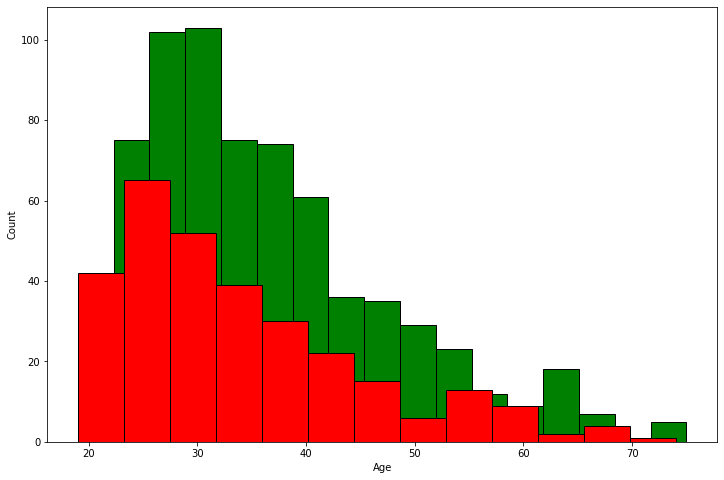

In [88]:
## Посмотрим на гистограммы для Возраста
plt.figure(figsize=(12, 8))
sns.histplot(scoring_data.query('is_risk == 0').Age, color='green', alpha=1)
sns.histplot(scoring_data.query('is_risk == 1').Age, color='red', alpha=1)

<AxesSubplot:xlabel='Duration', ylabel='Count'>

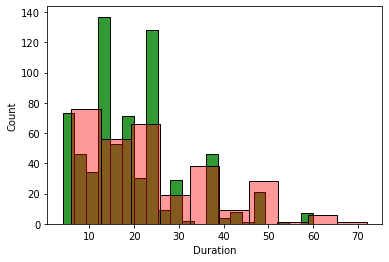

In [93]:
## Посмотрим на гистограммы для Срока кредитования
sns.histplot(scoring_data.query('is_risk == 0').Duration, color='green', alpha=.8)
sns.histplot(scoring_data.query('is_risk == 1').Duration, color='red', alpha=.4)

<AxesSubplot:xlabel='Credit amount', ylabel='Count'>

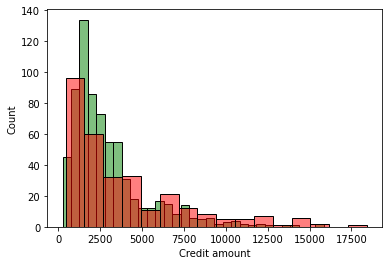

In [94]:
## Посмотрим на гистограммы для Суммы кредитования
sns.histplot(scoring_data.query('is_risk == 0')['Credit amount'], color='green', alpha=0.5)
sns.histplot(scoring_data.query('is_risk == 1')['Credit amount'], color='red', alpha=0.5)

### Построим сглаженные гистограммы

<AxesSubplot:xlabel='Age', ylabel='Density'>

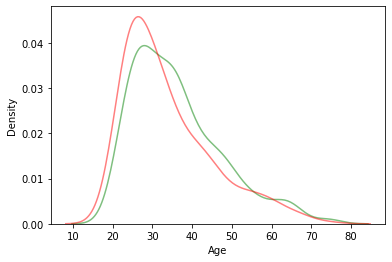

In [89]:
## Посмотрим на гистограммы для Возраста
sns.kdeplot(scoring_data.query('is_risk == 0').Age, color='green', alpha=0.5)
sns.kdeplot(scoring_data.query('is_risk == 1').Age, color='red', alpha=0.5)

<AxesSubplot:xlabel='Duration', ylabel='Density'>

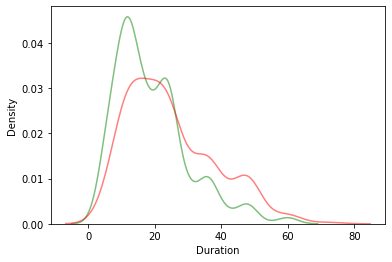

In [95]:
## Посмотрим на гистограммы для Срока кредитования
sns.kdeplot(scoring_data.query('is_risk == 0').Duration, color='green', alpha=0.5)
sns.kdeplot(scoring_data.query('is_risk == 1').Duration, color='red', alpha=0.5)

<AxesSubplot:xlabel='Credit amount', ylabel='Density'>

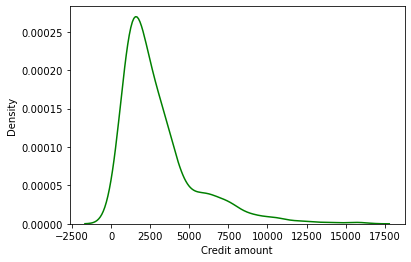

In [105]:
## Их кстати можно объединить на один график
sns.kdeplot(scoring_data.query('is_risk == 0')['Credit amount'], color='green')
# sns.kdeplot(scoring_data.query('is_risk == 1')['Credit amount'], color='red')

In [129]:
from scipy import stats

In [138]:
m = stats.mode(scoring_data.query('is_risk == 0')['Credit amount']).mode[0]

<AxesSubplot:xlabel='Credit amount', ylabel='Density'>

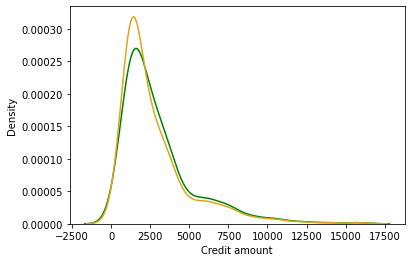

In [141]:
sns.kdeplot(scoring_data.query('is_risk == 0')['Credit amount'], color='green')
sns.kdeplot(scoring_data.query('is_risk == 0')['Credit amount'].append(pd.Series([m] * 100)).reset_index(drop=True), color='goldenrod')



## Оценим с помощью метода [WoE / IV](https://ecommerce-in-ukraine.blogspot.com/2020/09/iv-woe.html)

In [ ]:
## Т.к. метод расчёта WoE работает только с категориальными или с ранговыми данными:
## сразу произведём биннинг для колонок Возраст, Сумма кредита и Срок кредитования
## таким образом мы получим три раноговых переменных взамен трёх количественных
## Для биннинга будем использовать метод np.digitize
## А для создания границ биннинга воспользуемся персентилями из метода describe

scoring_data['age_bucket'] = np.digitize(scoring_data['Age'], [19, 23, 35, 60, 75])
scoring_data['amount_bucket'] = np.digitize(scoring_data['Credit amount'], [250, 1000, 5000, 18424])
scoring_data['duration_bucket'] = np.digitize(scoring_data['Duration'], [4, 12, 24, 72])

In [ ]:
scoring_data

In [ ]:
def calc_woe_by_column(column):
    
    """
    Функция позволяет рассчитать метрику WoE для указанной колонки.
    Работает только для категориальных и ранговых переменных.
    """
    
    tmp = scoring_data.groupby(column, as_index=False).agg(
        {
            'is_risk': np.sum,
            'Age': lambda x: x.count(),
        }
    ).rename(
        {'Age': 'all_cases'},
        axis=1
    ).assign(
        not_risk = lambda x: x['all_cases'] - x['is_risk']
    )

    n_risk = tmp['is_risk'].sum()
    n_not_risk = tmp['not_risk'].sum()

    tmp['WoE'] = np.round(np.log((tmp['is_risk'] / n_risk) / (tmp['not_risk'] / n_not_risk)), 3)
    tmp['reason'] = column + '_' + tmp[column].astype(str)
    tmp = tmp[tmp.WoE != np.inf]
    tmp = tmp[tmp.WoE != -np.inf]
    
    return tmp.sort_values(
        by='WoE',
        ascending=False
    )[['reason', 'WoE', 'is_risk', 'not_risk']].reset_index(drop=True)


def get_IV(column):
    
    """
    Функция позволяет рассчитать метрику IV для указанной колонки.
    IV - information value позволяет объединить все значения WoE по колонке в одно число.
    Работает только для категориальных и ранговых переменных.
    """
    
    tmp = calc_woe_by_column(column)
    return ((tmp['is_risk'] - tmp['not_risk']) * tmp['WoE']).sum()

In [ ]:
calc_woe_by_column('Checking account')

In [ ]:
np.log((135 / 300 )/ (139 / 700))

In [ ]:
result

In [ ]:
np.log(348/ 150)

In [ ]:
pd.isna(scoring_data)

In [ ]:
## Объединим все факторы в одну таблицу и выведем, отсортированными по влиянию
result = calc_woe_by_column('Sex')
for col in scoring_data.columns.drop(['is_risk', 'Risk', 'Credit amount', 'Duration', 'Age', 'Sex']):
    result = pd.concat([result, calc_woe_by_column(col)], 0, ignore_index=True)
    
result.sort_values(by='WoE', ascending=False).reset_index(drop=True)

In [ ]:
## Посмотрим на влияние каждой отдельной колонки на рисковость пользователя с помощью IV
for col in scoring_data.columns.drop(['is_risk', 'Risk', 'Credit amount', 'Duration', 'Age']):
    print(col, get_IV(col))